# Herramientas de visualización - Algunos consejos útiles

En este cuaderno hacemos una exploración por los diversos tipos de gráficos que tenemos a nuestra disposición. Evaluaremos diferentes situaciones y daremos algunos consejos de el tipo de gráfico que mejor se ajuste a los datos analizados. No vamos a establecer unas reglas, en muchas de estas situaciones se apremia la creatividad de la persona que conoce la información, sin embargo, estos tips suelen destrabar ese espiritu creativo.

In [1]:
import numpy as np
import pandas as pd
#import dataprep.eda as dp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, Layout
import ipywidgets as widgets

## (Caso 1) AIRBNB en Bogotá

Exploraremos una base de datos referente a la actividad de alojamientos ARBNB en Bogotá en el año 2018. No será una evaluación exhaustiva de la base dado que nuestro interés es establecer consejos útiles para situaciones determinadas, sin embargo, cuando terminems aquí lo invitamos a continuar en esta tarea para extraer la mayor cantidad de información. Usaremos solo tres variables de la base original que puede ser consultada en [datosabiertosbogota](https://datosabiertos.bogota.gov.co/dataset/barrios_airbnb-bogota-2015-2019-mensual)

### Diccionario de la base

Ingreso_Hab_Dia (S)	Suma por Sector Catastral (Barrio), de los ingresos diarios por habitación (en dólares estadounidenses)  

ADR_USD(P)	Tarifa diaria promedio (ADR) de noches reservadas en USD. ADR = Ingresos totales / Noches reservadas

Public_Noct_USD(P)	Promedio de la tarifa nocturna predeterminada para una lista de alquileres de vacaciones en dólares estadounidenses

Fotos(P)	Número promedio de fotos publicadas por Sector Catastral (Barrio)

Mascotas(M)	(Moda estadística) del permiso o no de ingreso de animales de compañía



In [2]:
DF=pd.read_csv('https://raw.githubusercontent.com/madcentral/visualizacion/master/files/airbnb2018.csv')

Usaremos `dataprep` para una primera vista, no vamos a terminar el proceso de exploración con esta línea, no obstante, vale la pena revisar diferentes aspectos de las variablesque analizaremos.

In [6]:
DF.describe(include='all')

,Ingreso_Hab_Dia (S),ADR_USD (P),Public_Noct_USD (P),Fotos (P),Mascotas (M)
count,6754.000000,6754.000000,6754.000000,6754.000000,6754
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,5219
mean,238.238362,26.290139,28.473097,10.800415,NaN
std,249.223300,16.334550,18.437688,5.905211,NaN
min,8.000000,8.000000,8.000000,1.000000,NaN
25%,61.000000,14.000000,14.500000,6.600000,NaN
50%,160.000000,22.000000,23.600000,10.000000,NaN
75%,346.025000,32.600000,36.775000,14.200000,NaN


Empezaremos analizando la variable `ADR_USD` que mide la tarifa diaria promedio (ADR) de noches reservadas en USD. 

$$ ADR = \cfrac{\text{Ingresos totales}}{\text{Noches reservadas}} $$

## Histograma

La forma más común de representar una única variable numérica es con un histograma. Nos permite comprender su distribución, desde un punto de vista discreto.

Cambiar el tamaño de los contenedores (bins), puede generar diferentes observaciones. No muestre la distribución de más de 5 variables. En su lugar, utilice un diagrama de violín o cresta (ridgeline). Evite llenar con paletas de colores.

In [8]:
fig = px.histogram(DF, x='ADR_USD (P)',nbins=3)
fig.show()

Juguemos con la cantidad de contenedores:

In [9]:
def histograma_ADR(n):
    fig = px.histogram(DF, x='ADR_USD (P)', nbins=n)
    fig.show()
    return
bins=widgets.IntSlider(value=20,
                      min=1,
                      max=200)

interact(histograma_ADR,n=bins)

interactive(children=(IntSlider(value=20, description='n', max=200, min=1), Output()), _dom_classes=('widget-i…

<function __main__.histograma_ADR(n)>

### Escoger el tamaño de los contenedores

El tamaño de los contenedores es un parámetro importante, y el uso del tamaño de contenedor incorrecto puede inducir a error al ocultar características importantes de los datos o al crear características aparentes a partir de la variabilidad aleatoria. De forma predeterminada, los diferentes paquetes gráficos eligen un tamaño de ubicación predeterminado en función de la varianza de los datos y el número de observaciones. Pero no debe depender demasiado de estos enfoques automáticos, ya que dependen de suposiciones particulares sobre la estructura de sus datos. Siempre es aconsejable verificar que sus impresiones de la distribución sean consistentes en diferentes tamaños de contenedores.

## Gráfico de densidad

Un histograma tiene como objetivo aproximar la función de densidad de probabilidad subyacente que generó los datos agrupando y contando observaciones. La estimación de la densidad de kernel (KDE) presenta una solución diferente al mismo problema. En lugar de utilizar bins discretos, un gráfico de KDE suaviza las observaciones con un kernel gaussiano, lo que produce una estimación de densidad continua. 

In [ ]:
sns.kdeplot(DF['ADR_USD (P)'],shade=True)

combinando con el histograma

In [ ]:
sns.histplot(DF['ADR_USD (P)'],kde=True,color="olive")

### Elegir el ancho de banda de suavizado
Al igual que con el tamaño del contenedor en el histograma, la capacidad de KDE para representar con precisión los datos depende de la elección del ancho de banda de suavizado. Una estimación demasiado suavizada puede borrar características significativas, pero una estimación poco suavizada puede ocultar la forma real dentro del ruido aleatorio. La forma más sencilla de comprobar la solidez de la estimación es ajustar el ancho de banda predeterminado:

In [10]:
def kde_ADR(bw):
    sns.kdeplot(DF['ADR_USD (P)'],shade=True,bw_method=bw)
    return
bw=widgets.FloatSlider(value=0.5,
                      min=0.001,
                       step=0.001,
                      max=1)

interact(kde_ADR,bw=bw)


interactive(children=(FloatSlider(value=0.5, description='bw', max=1.0, min=0.001, step=0.001), Output()), _do…

<function __main__.kde_ADR(bw)>

In [ ]:
#Ancho de banda corto
sns.kdeplot(DF['ADR_USD (P)'],shade=True, bw_adjust=.2)

## Como se relaciona el Promedio de la tarifa nocturna en la tarifa diaria promedio (ADR) de noches reservadas

Vamos ahora a relacionar dos variables, el promedio de la tarifa nocturna con la tarifa diaria promedio (ADR). Claramente el diagrama de dispersión (scatterplot) es el predilecto para este ejercicio, sin embargo, corremos el riesgo de hacer *overplotting* (sobreimpresión) un error que se genera cuado varios puntos caen en una misma locación. Veremos diferentes alternativas para superar este problema. 


### Diagrama de dispersión

Representa la distribución conjunta de dos variables mediante una nube de puntos, donde cada punto representa una observación en el conjunto de datos. Esta descripción permite al ojo inferir una cantidad sustancial de información sobre si existe alguna relación significativa entre las variables.


In [ ]:
sns.relplot(x="ADR_USD (P)", y="Public_Noct_USD (P)", data=DF)

Si bien los puntos se representan en dos dimensiones, se puede agregar otra dimensión al gráfico coloreando los puntos según una tercera variable. Utilizaremos la variable Mascotas.

In [ ]:
fig = px.scatter(DF, x="ADR_USD (P)", y="Public_Noct_USD (P)", color="Mascotas (M)",hover_data=['Fotos (P)'])
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
)
fig.show()

### Luchando contra la sobreimpresión

### Histograma 2D

También conocido como mapa de calor de densidad, es la generalización bidimensional de un histograma que se asemeja a un mapa de calor, pero se calcula agrupando un conjunto de puntos especificados por sus coordenadas x e y en bins y aplicando una función de agregación como count o sum (si se proporciona z) para calcular el color del mosaico que representa el contenedor. Este tipo de visualización (y el contorno del histograma 2D relacionado, o el contorno de densidad) se utiliza a menudo para gestionar la sobreimpresión o situaciones en las que mostrar grandes conjuntos de datos como diagramas de dispersión daría lugar a puntos superpuestos entre sí y ocultando patrones. 


<Axes: xlabel='ADR_USD (P)', ylabel='Public_Noct_USD (P)'>

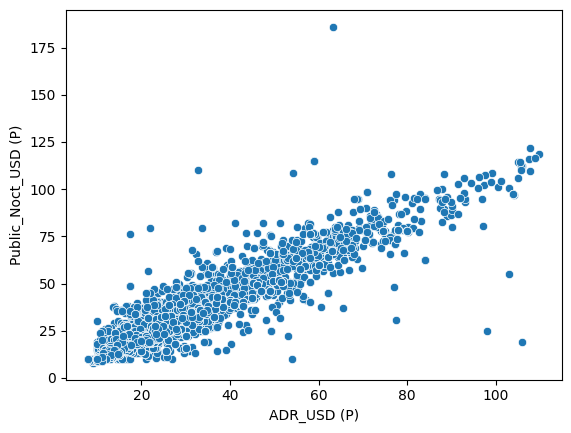

In [14]:
## Con seaborn
sns.scatterplot(data=DF, x="ADR_USD (P)", y="Public_Noct_USD (P)")


In [12]:
# con plotly.express
fig = px.density_heatmap(DF, x="ADR_USD (P)", y="Public_Noct_USD (P)",)
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
)
fig.show()

Podemos agregar distribuciones marginales: 

In [ ]:
# con plotly.express
fig = px.density_heatmap(DF, x="ADR_USD (P)", y="Public_Noct_USD (P)",marginal_x="histogram", marginal_y="box")
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
)
fig.show()

Así como incluimos un histograma 2D también podemos utilizar un gráfico de densidad. Usaremos únicamente seaborn en esta parte, sin embargo en plotly.express muchos de estos gráficos se pueden hacer:

In [ ]:
sns.jointplot(data=DF, x="ADR_USD (P)", y="Public_Noct_USD (P)",  hue="Mascotas (M)",kind='kde')


Podemos incluir también una línea de tendencia:

In [ ]:
sns.jointplot(data=DF, x="ADR_USD (P)", y="Public_Noct_USD (P)",kind='reg')


Y podemos evaluar la densidad con histogramas hexagonales:

In [ ]:
sns.jointplot(data=DF, x="ADR_USD (P)", y="Public_Noct_USD (P)",kind='hex')


## (Caso 2) Evolución del precio del BitCoin

Este caso presenta sugerencias para analizar un conjunto de datos compuesto por dos variables numéricas ordenadas. Considera la evolución del precio de bitcoin entre abril de 2013 y abril de 2018.

*Es tomado de [From data to viz](https://www.data-to-viz.com/)*

In [ ]:
DFBitcoin=pd.read_table('https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv',sep=" ")

### Gráficos de línea

La representación visual debe adaptarse a las características específicas del conjunto de datos y a la pregunta que está tratando de responder con la trama. Con los conjuntos de datos, cuya variable está en función del tiempo u otra variable continua similar requiere una gráfica lineal. 

In [ ]:
DFBitcoin['date']=pd.to_datetime(DFBitcoin['date'])

Recuerde tener el formato adecuado de los datos

In [ ]:
g=sns.relplot(x="date", y="value", kind="line", data=DFBitcoin)
g.fig.autofmt_xdate()

### Agregación y representación de la incertidumbre
Los conjuntos de datos más complejos tendrán múltiples medidas para el mismo valor de la variable x. Para nuestra base de dtos calcularemos el mes correspondiente a cada fecha. En ese caso, tendremos los diferentes precios del Bitcoin medidos en diferentes meses:

In [ ]:
DFBitcoin['Mes']=DFBitcoin['date'].dt.month

In [ ]:
DFBitcoin

Los intervalos de confianza se calculan por defecto, con un 95% de confianza:

In [ ]:
sns.relplot(x="Mes", y="value", kind="line", data=DFBitcoin);

Como se calculan  mediante bootstrapping, que puede requerir mucho tiempo para conjuntos de datos más grandes. Es posible inhabilitarlos:

In [ ]:
sns.relplot(x="Mes", y="value", ci=None, kind="line",data=DFBitcoin);

o modificarlo

In [ ]:
sns.relplot(x="Mes", y="value", ci=99, kind="line",data=DFBitcoin);

Si quisiera también puede usar la desviación estándar:

In [ ]:
sns.relplot(x="Mes", y="value", ci='sd', kind="line",data=DFBitcoin);

## Gráfico de áreas
Un gráfico de áreas es realmente similar a un gráfico de líneas, excepto que el área entre el eje x y la línea se rellena con color o sombreado. Representa la evolución de una variable numérica. Hace que la tendencia sea más obvia que usar un gráfico de líneas.

In [ ]:
fig = px.area(DFBitcoin, x="date", y="value")
fig.show()

### En caso de evaluar pocos datos

Veamos ahora algunas sugerencias para series que no toman el valor nulo:

In [ ]:
DFBitcoin_corta=DFBitcoin[DFBitcoin['date']>'04-2018']

In [ ]:
fig = px.area(DFBitcoin_corta, x="date", y="value")
fig.show()

El gráfico anterior puede resultar un poco frustrante. De hecho, es difícil estudiar la evolución del bitcoin en este gráfico ya que el precio oscila entre los 7.500 y los 9.500 dólares en este período, cuando el eje Y oscila entre 0 y 10.000. En este caso, es una buena práctica cortar el eje Y para ampliar la variación. 

In [ ]:
fig = px.area(DFBitcoin_corta, x="date", y="value",range_y=(6500,9500))
fig.show()

A veces, uno puede estar interesado en comparar el valor con un umbral específico. En este caso, puede llenar el área en función de este umbral, con 2 colores diferentes dependiendo de si el valor está por encima o por debajo del umbral:

In [ ]:
DFBitcoin_corta['Nivel']=8000

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=DFBitcoin_corta['date'], y=DFBitcoin_corta['value'],
    fill=None,
    mode='lines',
    line_color='indigo',name='Precio'
    ))
fig.add_trace(go.Scatter(x=DFBitcoin_corta['date'], y=DFBitcoin_corta['Nivel'],
    fill='tonexty', 
    mode='lines', line_color='blue',name='Constante'))

fig.show()


## (Caso 3) Quien vende más armas

Es tomado de [From data to viz](https://www.data-to-viz.com/)

Veremos algunas sugerencias para graficar datos compuestos por variables numéricas y categóricas. El conjunto de datos utilizado como ejemplo proporciona la cantidad de armas exportadas por los 50 principales exportadores más grandes en 2017. Este conjunto de datos se ha descargado en el sitio web del Instituto Internacional de Investigación para la Paz de Estocolmo y hay más información disponible [aquí.](http://www.sipri.org/databases/armstransfers/sources-and-methods/)

In [ ]:
DFArmas=pd.read_csv('https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv')

In [ ]:
DFArmas = DFArmas.sort_values(by='Value')

In [ ]:
DFArmas=DFArmas[~DFArmas.isnull().Value]

## Paletas

La forma más común de representar este tipo de información es probablemente usando gráficos de barras, las paleticas pueden ser una buena alternativa, por su sencilles y ligereza. Básicamente es lo mismo, pero la barra se reemplaza por una línea y un punto al final. Permite que la figura esté menos apeñuscada.

Las usamos horizontales.

In [ ]:

my_range=range(1,len(DFArmas.index)+1)
fig,ax=plt.subplots(figsize=(12,10))
# The vertcval plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
ax.hlines(y=my_range, xmin=0, xmax=DFArmas['Value'],  alpha=0.4)
ax.scatter(DFArmas['Value'], my_range, alpha=1)
 
# Add title and exis names
plt.yticks(my_range, DFArmas['Country'])
plt.title("Los que más venden armas", loc='left')
plt.xlabel('Total')
plt.ylabel('País')
plt.grid()
plt.show()

## Diagrama de barras



Un diagrama de barras (o gráfico de barras) es uno de los tipos de gráficos más comunes. Muestra la relación entre una variable numérica y una categórica. Cada entidad de la variable categórica se representa como una barra. El tamaño de la barra representa su valor numérico.

In [ ]:
DFArmas = DFArmas.sort_values('Value',ascending=False)
fig,ax=plt.subplots(figsize=(12,10))
sns.barplot(data=DFArmas, x="Value",y='Country')
ax.set_xlabel("Qualitative")

### Diagrama de barras circular

La gráfica de barras circular es una alternativa a las gráficas de barras, donde cada barra se coloca alrededor de un círculo en lugar de a lo largo de una línea. El beneficio es que su figura se vuelve más llamativa y utiliza el espacio de manera más eficiente. Sin embargo, las diferencias entre grupos se vuelven más difíciles de leer. 

In [ ]:
from matplotlib import cm

DFArmas_corta=DFArmas.head(4)
labels = DFArmas_corta.Country
data = DFArmas_corta.Value
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(np.log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}
                          , colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()

## Mapa de árbol

Un mapa de árbol representa cada entidad como un rectángulo, con un área que es proporcional a la variable numérica del conjunto de datos.
Es una buena forma de mostrar una descripción general de la organización de los datos y probablemente sea más llamativa que la gráfica de barras anterior. Sin embargo, es menos preciso en el sentido de que es más difícil hacer comparaciones precisas entre grupos.

In [ ]:
fig = px.treemap(DFArmas, 
                 path= ['Country', 'Value'], 
                 values='Value',
                )
fig.show()

## Intermesso -  Algunos gráficos interesantes

### Diagrama de Gantt

Un diagrama de Gantt es un tipo de diagrama de barras que ilustra el cronograma de un proyecto. El gráfico enumera las tareas a realizar en el eje vertical y los intervalos de tiempo en el eje horizontal. El ancho de las barras horizontales en el gráfico muestra la duración de cada actividad.



In [15]:
df = pd.DataFrame([
    dict(Tarea="Pensar la tesis", Start='2020-01-01', Finish='2020-02-28',Dolor='Medio'),
    dict(Tarea="Llorar por la tesis", Start='2020-01-05', Finish='2020-04-15',Dolor='Mucho'),
    dict(Tarea="Olvidar por la tesis", Start='2020-04-16', Finish='2020-05-20',Dolor='Poco'),
    dict(Tarea="Hacer la tesis", Start='2020-05-20', Finish='2020-05-30',Dolor='No registra')
])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Tarea",color="Dolor")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

### Embudos

Los gráficos de embudo se utilizan a menudo para representar datos en diferentes etapas de un proceso empresarial. Es un mecanismo importante en Business Intelligence para identificar posibles áreas problemáticas de un proceso. Por ejemplo, se utiliza para observar los ingresos o las pérdidas en un proceso de ventas para cada etapa y muestra valores que disminuyen progresivamente. Cada etapa se ilustra como un porcentaje del total de todos los valores.

In [ ]:
data = dict(
    number=[39, 27.4, 20.6, 11, 2],
    stage=["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"])
fig = px.funnel(data, x='number', y='stage')
fig.show()

In [ ]:
stages = ["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"]
df_mtl = pd.DataFrame(dict(number=[39, 27.4, 20.6, 11, 3], stage=stages))
df_mtl['office'] = 'Montreal'
df_toronto = pd.DataFrame(dict(number=[52, 36, 18, 14, 5], stage=stages))
df_toronto['office'] = 'Toronto'
df = pd.concat([df_mtl, df_toronto], axis=0)
df

In [ ]:
fig = px.funnel(df, x='number', y='stage', color='office')
fig.show()

### Rayos de sol (Sunburst)

Los gráficos de rayos de sol visualizan datos jerárquicos que se extienden radialmente hacia afuera desde la raíz hasta las hojas. La jerarquía del sector sunburst está determinada por las entradas en las etiquetas (nombres en px.sunburst) y en los padres. La raíz comienza desde el centro y se agregan a los anillos externos.

Argumentos principales:

**labels (nombres en px.sunburst ya que las etiquetas están reservadas para anular los nombres de las columnas)**: establece las etiquetas de los sectores de rayos solares.

**parents:** establece los sectores padre de los sectores de rayos solares. Se utiliza una cadena vacía '' para el nodo raíz en la jerarquía. En este ejemplo, la raíz es "Eva".

**values:** establece los valores asociados con los sectores de rayos solares, determinando su ancho (Consulte la sección de valores de rama a continuación para conocer los diferentes modos para establecer el ancho).



In [ ]:
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])
pd.DataFrame(data=data)

In [ ]:
fig =px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

Sunburst usado en DataFrame Rectángular, observe como se define el orden de los anillos:



In [ ]:
df = px.data.tips()
df

In [ ]:
fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

In [ ]:
fig = px.sunburst(df, path=['sex', 'time', 'day'], values='total_bill')
fig.show()

También se pueden incluir variables numéricas para modificar los pesos `weights`:

In [ ]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.show()

### Gráfico de Burbujas

Aprovechamos esta base de datos para hablar de tres variables numéricas o más. La base anterior es la famosa base GAPMINDER que se hizo famosa a través de Hans Rosling Ted Talk. Proporciona la esperanza de vida media, el pib per cápita y el tamaño de la población de más de 100 países.

In [ ]:
df

In [ ]:
px.scatter(df,x='gdpPercap',y='lifeExp',size='pop',size_max=70,color='continent',hover_name='country')

El problema con el diagrama de burbujas es que la relación entre la variable de los ejes X e Y es mucho más obvia que la relación con la tercera variable. Por eso se debe priorizar las variables y estar seguro de lo que se quiere mostrar. Antes de hacer ese tipo de gráfico, creo que es una buena práctica probar otras combinaciones:

In [ ]:
px.scatter(df,x='gdpPercap',size='lifeExp',y='pop',color='continent',hover_name='country')

In [ ]:
px.scatter(df,x='lifeExp',size='gdpPercap',y='pop',color='continent',hover_name='country')

En este caso, no existe una relación obvia entre la población y otras métricas, por lo que tiene sentido utilizar la población para el tamaño de la burbuja.

Si solo desea resaltar la relación entre el GBP per cápita y la esperanza de vida, probablemente ya haya hecho la mayor parte del trabajo. Sin embargo, es una buena práctica resaltar algunos puntos interesantes en este gráfico para dar más información sobre la trama:

## (Caso 4)  Nombres de Bebe

Este caso tiene como objetivo describir algunas visualizaciones de datos que se pueden aplicar a un conjunto de datos que contiene una variable numérica ordenada, una variable categórica y otra variable numérica. Como ejemplo, consideraremos la evolución de las frecuencias de nombres de bebés en los EE. UU. Entre 1880 y 2015.

In [ ]:
DfBebes=pd.read_csv('https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/5_OneCatSevNumOrdered.csv')

In [ ]:
DfBebes

La primera visualización obvia para representar este conjunto de datos es producir un gráfico de líneas. Cada nombre de bebé está representado por una línea. El eje X indica el año y el eje Y muestra el número de bebés.

In [ ]:
fig = px.line(DfBebes, x="year", y="n", color='name')
fig.show()

Los gráficos de líneas tienden a estar demasiado desordenados tan pronto como se muestran más de unos pocos grupos. Este es un error común en la visualización de datos, tan común que se le ha denominado gráfico de espaguetis. Por lo tanto, esta solución generalmente se aplica si desea resaltar un grupo específico de todo el conjunto de datos. Por ejemplo, resaltemos la evolución de Amanda en comparación con los otros nombres, basta con en el mismo gráfico hacer click sobre Amanda en el cuadro de la derecha: 

In [ ]:
fig = px.line(DfBebes, x="year", y="n", color='name')
fig.show()